In [1]:
from model_complex import Calibration
import matplotlib.pyplot as plt

d = Calibration('BR-total', 100)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


ImportError: attempted relative import beyond top-level package

In [8]:
d.plot('spb', './', '7-01-2017', '6-20-2018')

FileNotFoundError: [Errno 2] No such file or directory: './epid_data/spb/epid_data.xlsx'

In [5]:
epid, simulation_func, data, _ = d.calibrate__abc('spb', './', '7-01-2018', '6-20-2019')

Initializing SMC sampler...
Sampling 4 chains in 4 jobs


Output()

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


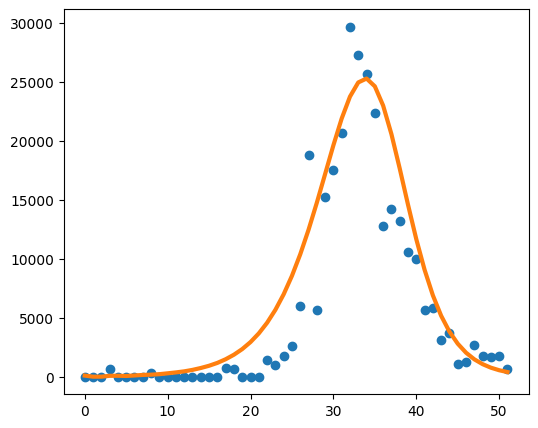

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
start_day = 15    
posterior = epid.posterior.stack(samples=("draw", "chain"))
ax.plot(list(data), "o")
ax.plot(simulation_func(None, posterior["alpha"].mean(), posterior["beta"].mean()), 
                linewidth=3)

In [10]:
from model_complex import FactoryBRModel
BRModel = FactoryBRModel.get_model('total')